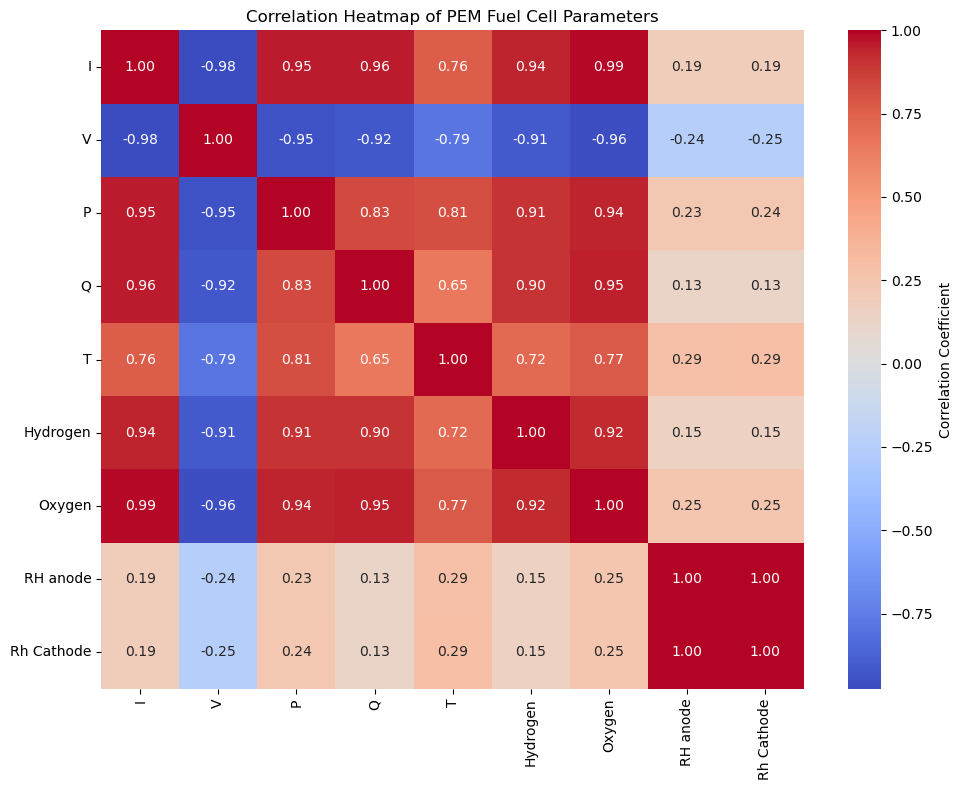

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("PEMfuel cell_1.csv")

# Convert all columns to numeric (in case of any non-numeric types)
df = df.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values (optional, for clean correlation matrix)
df = df.dropna()

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of PEM Fuel Cell Parameters')
plt.tight_layout()
plt.show()


R² Score: 0.9554580021702905
MSE: 244.37894117508714


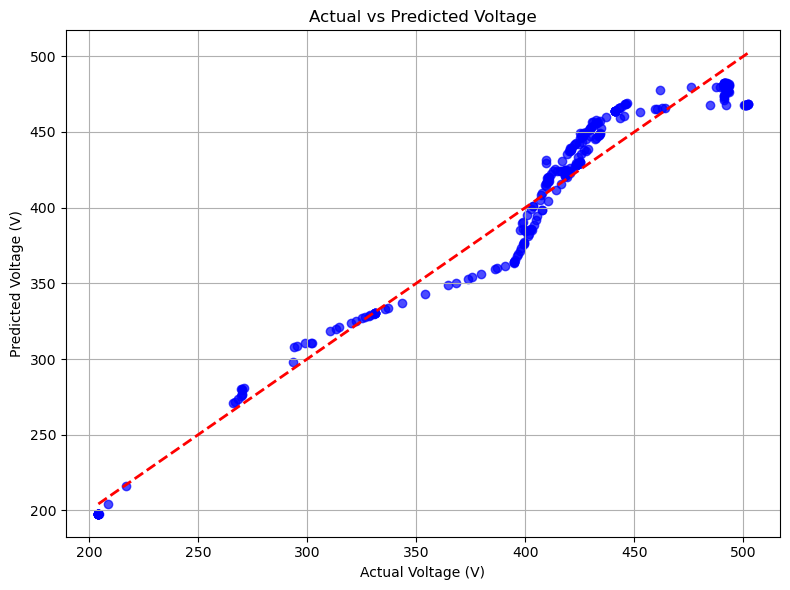

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv("PEMfuel cell_1.csv")  # Make sure the file is in the working directory

# Select features and target
features = ['I', 'Oxygen', 'P', 'Hydrogen', 'Q', 'T']
X = df[features]
y = df['V']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Voltage (V)")
plt.ylabel("Predicted Voltage (V)")
plt.title("Actual vs Predicted Voltage")
plt.grid(True)
plt.tight_layout()
plt.show()
